# GRIP:THE SPARKS FOUNDATION
Data Science & Business Analytics Internship

TASK 1: PREDICTION USING SUPERVISED ML

Submitted By: Shruti Sunnad

Predict the percentage of a student based on the no. of study hour

## **Linear Regression with Python Scikit Learn**
In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.

### **Simple Linear Regression**
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [1]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading data from remote link
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully")

data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
data.shape

(25, 2)

In [4]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

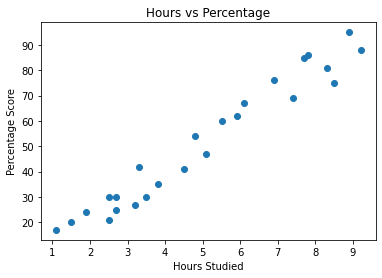

In [6]:
# Plotting the distribution of scores
#data.plot(x='Hours', y='Scores')  
plt.scatter(x='Hours', y='Scores',data=data)
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

In [7]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


<AxesSubplot:ylabel='Density'>

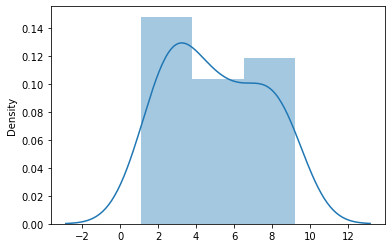

In [8]:
sns.distplot(x=data['Hours'])

<AxesSubplot:ylabel='Density'>

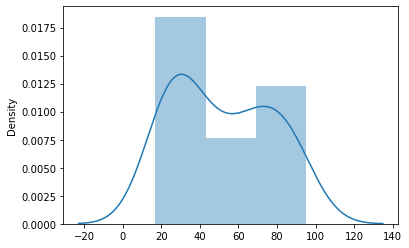

In [9]:
sns.distplot(x=data['Scores'])

# Linear Regression

### **Preparing the data**

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [10]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [11]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

### **Training the Algorithm**
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [12]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

LinearRegression()

In [13]:
tr_acc=regressor.score(X_train, y_train)
ts_acc=regressor.score(X_test,y_test)
tr_acc,ts_acc

(0.9515510725211552, 0.9454906892105356)

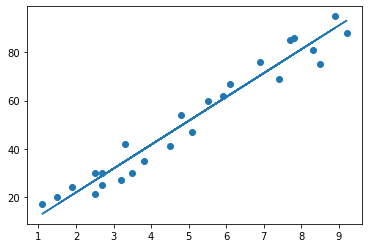

In [14]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

### **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.

In [15]:
y_pred = regressor.predict(X_test) # Predicting the scores

In [16]:
# Comparing Actual vs Predicted scores
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [17]:
from sklearn.metrics import mean_absolute_error,r2_score
print('Mean Absolute Error:',mean_absolute_error(y_test, y_pred))
print('R2 Score:',r2_score(y_test,y_pred))

Mean Absolute Error: 4.183859899002975
R2 Score: 0.9454906892105356


In [18]:
# You can also test with your own data

hours = float(input('Enter number of Study Hours: '))
own_pred = regressor.predict([[hours]])
print("Score = {}".format(round(own_pred[0],3)))

Enter number of Study Hours: 9.25
Score = 93.692


According to the regression model if a student studies for 9.25 hours a day he/she is likely to score 93.692 marks